In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
import io
import requests
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
def deleteUselessData(df):
    del df["race"]  
#    del df["name"] we need it in merge
    del df["address"]
    del df["education"] 
    del df["relationship"]
    del df["personal_info"]
    
def unifyPreg(df):
    df['pregnant'] = df['pregnant'].map({'f': 0, 'F': 0, 'FALSE': 0, 't': 1, 'T': 1, 'TRUE': 1})
    df['pregnant'] = df['pregnant'].fillna(0.0).astype(int)
    
def unifyIncome(df):
    df['income'] = df['income'].map({' <=50K': 0, ' >50K': 1})
    df['income'] = df['income'].fillna(0.0).astype(int)
    
def correctPersonalInd(df):
    df["personal_info"] = df["personal_info"].str.replace('\r\r\n', '|')
    new = df["personal_info"].str.split("|", expand = True)
    df["job"] = new[0]
    df["country"] = new[1]
    df["relation"] = new[2]
    df["race"] = new[3]

def unifyRelations(df):
    maxid = df['relationship'].value_counts().idxmax()
    df["relationship"].fillna("nan",inplace=True)
    df.loc[df['relationship'] == 'nan','relationship'] = maxid
    
    relations = df["relationship"].unique()
    for a in relations:
        df[a] = df['relationship'] == a
        df[a] = df[a].map({False: 0, True: 1})   

def fillMissingCountry(df):
    df["country"].fillna('?', inplace = True) 
    df.loc[df['country'] == '?'] = "nan"
    
    imp = SimpleImputer(missing_values = "nan", strategy='most_frequent')
    imp.fit(train_1.loc[:,['country', 'race']])
    
    df.loc[:,['country', 'race']] = imp.transform(df.loc[:,['country', 'race']])
    
def unifyRace(df):
    race = df["race"].unique()
    for a in race:
        df[a] = df["race"] == a
        df[a] = df[a].map({False: 0, True: 1})  
    
def unifyEduc(df):
    df["education"] = df["education"].replace(to_replace = [' 12th', ' HS-grad', ' 10th', ' 5th-6th', ' 7th-8th', ' 9th', ' 11th', ' 1st-4th', ' Preschool'], value = 'pre-collage')
    df["education"] = df["education"].replace(to_replace = [' Some-college', ' Assoc-acdm', ' Assoc-voc', ' Prof-school'], value = 'collage')
    df["education"] = df["education"].replace(to_replace = [' Bachelors', ' Masters', ' Doctorate'], value = 'post-collage')
    
    df["education-num"].fillna('nan', inplace = True)
    df["education"].fillna('nan', inplace = True) 

    imp = SimpleImputer(missing_values = "nan", strategy='most_frequent')
    imp.fit(df.loc[:,['education-num', 'education']])
    
    df.loc[:,['education-num', 'education']] = imp.transform(df.loc[:,['education-num', 'education']])
    
    race = df["education"].unique()
    
    for a in race:
        df[a] = df["education"] == a
        df[a] = df[a].map({False: 0, True: 1})
        
def correctExtremes(df, col):
    df[col] = pd.to_numeric(df[col],errors='coerce')
    #train_1[col] = pd.to_numeric(train_1[col],errors='coerce')
    mean = train_1[col].mean()
    df[col].fillna(mean, inplace = True) 

    botQ = train_1[col].quantile(0.25) - 1.5 * sc.iqr(train_1[col])
    topQ = train_1[col].quantile(0.25) + 1.5 * sc.iqr(train_1[col])

    Q5 = train_1[col].quantile(0.20)
    Q95 = train_1[col].quantile(0.80)

    for a in df[col]:
        if a < botQ:
            a = Q5
        elif a > topQ:
            a = Q95
    
def fillJob(df):
    maxid = df['job'].value_counts().idxmax()
    df["job"].fillna("?",inplace=True)
    df.loc[df['job'] == '?','job'] = maxid
    
def fillClass(df):
    maxid = train_1["class"].value_counts().idxmax()
    df["class"].fillna("nan",inplace=True)
    df.loc[df["class"] == 'nan',"class"] = maxid
    df["class"] = pd.to_numeric(df['class']) 
    

In [7]:
url1 = "https://raw.githubusercontent.com/LBukai/IAU_project/master/other_train.csv"
url2 = "https://raw.githubusercontent.com/LBukai/IAU_project/master/personal_train.csv"

url3 = "https://raw.githubusercontent.com/LBukai/IAU_project/master/other_valid.csv"
url4 = "https://raw.githubusercontent.com/LBukai/IAU_project/master/personal_valid.csv"

db1 = requests.get(url1).content
db2 = requests.get(url2).content

db3 = requests.get(url3).content
db4 = requests.get(url4).content

train_1 = pd.read_csv(io.StringIO(db1.decode('utf-8')))
train_2 = pd.read_csv(io.StringIO(db2.decode('utf-8')))

valid_1 = pd.read_csv(io.StringIO(db3.decode('utf-8')))
valid_2 = pd.read_csv(io.StringIO(db4.decode('utf-8')))

In [8]:
# modifu train
unifyPreg(train_1)
unifyIncome(train_1)
correctPersonalInd(train_1)
fillMissingCountry(train_1)
fillJob(train_1)
fillClass(train_1)

In [9]:
correctExtremes(train_1, 'skewness_glucose')
correctExtremes(train_1, 'mean_glucose')
correctExtremes(train_1, 'std_oxygen')
correctExtremes(train_1, 'kurtosis_glucose')
correctExtremes(train_1, 'fnlwgt')
correctExtremes(train_1, 'std_glucose')
correctExtremes(train_1, 'mean_oxygen')


In [10]:
unifyPreg(valid_1)
unifyIncome(valid_1)
correctPersonalInd(valid_1)
fillMissingCountry(valid_1)
fillJob(valid_1)
fillClass(valid_1)
unifyRelations(valid_1)
unifyRace(valid_1)
unifyEduc(valid_1)

valid_1.head()

,Unnamed: 0,name,address,kurtosis_oxygen,pregnant,education-num,relationship,skewness_glucose,mean_glucose,std_oxygen,...,Wife,Other-relative,Black,White,Asian-Pac-Islander,Amer-Indian-Eskimo,Other,collage,post-collage,pre-collage
0,0,Mauricio Thornbury,"81911 Walker Mall Apt. 577\r\nPort Tara, SD 05299",10.0161,0,10.0,Unmarried,-0.209469,130.07,13.1701,...,0,0,1,0,0,0,0,1,0,0
1,1,Samuel Schneider,Unit 6750 Box 0176\r\nDPO AE 17702,-0.641248,0,10.0,Unmarried,-0.0636653,123.805,72.7327,...,0,0,0,1,0,0,0,1,0,0
2,2,Ramon Butcher,"4132 Garcia Lake\r\nNorth Nancyside, MS 87804",8.33364,0,13.0,Husband,0.077016,125.344,16.2017,...,0,0,1,0,0,0,0,0,1,0
3,3,John Rodriguez,"63055 Marilyn Park\r\nCrystalburgh, SD 97193",10.5986,0,9.0,Own-child,1.62017,98.4688,15.3349,...,0,0,0,1,0,0,0,0,0,1
4,4,Alan Jackson,USNS Myers\r\nFPO AA 34795,7.76492,0,16.0,Husband,0.0120765,124.867,22.601,...,0,0,0,1,0,0,0,0,1,0


In [11]:
correctExtremes(valid_1, 'skewness_glucose')
correctExtremes(valid_1, 'mean_glucose')
correctExtremes(valid_1, 'std_oxygen')
correctExtremes(valid_1, 'kurtosis_glucose')
correctExtremes(valid_1, 'fnlwgt')
correctExtremes(valid_1, 'std_glucose')
correctExtremes(valid_1, 'mean_oxygen')

deleteUselessData(valid_1)

In [12]:
unifyRelations(train_1)
unifyRace(train_1)
unifyEduc(train_1)

deleteUselessData(train_1)

In [13]:
corr = train_1.corr()
corr.style.background_gradient(cmap='coolwarm')

,education-num,skewness_glucose,mean_glucose,std_oxygen,kurtosis_glucose,fnlwgt,class,std_glucose,mean_oxygen,Unmarried,Husband,Not-in-family,Own-child,Wife,Other-relative,Black,White,Amer-Indian-Eskimo,Asian-Pac-Islander,Other,collage,post-collage,pre-collage
education-num,1,0.021398,-0.0190307,0.0260232,0.0214419,-0.0398826,0.030019,0.013749,0.0184783,-0.0372824,0.068277,0.051426,-0.111898,0.0480929,-0.0865621,-0.072188,0.0648842,-0.0397304,0.0587149,-0.084841,0.147679,0.705565,-0.728986
skewness_glucose,0.021398,1,-0.823995,0.55698,0.960041,-0.0192587,0.672197,-0.0156401,0.545401,-0.0152859,0.0277095,0.00321725,-0.0184774,-0.0166229,-0.001479,-0.00496474,0.00718121,-0.00476083,-0.0152168,0.0208415,0.022059,0.00638386,-0.0257334
mean_glucose,-0.0190307,-0.823995,1,-0.559182,-0.921789,0.0147402,-0.769331,0.0101749,-0.541364,0.000725636,-0.016501,-0.010426,0.0258736,0.0184509,-0.00503545,-0.00248188,-0.00894758,-0.000827818,0.0249606,-0.00267403,-0.0104674,-0.00323523,0.012384
std_oxygen,0.0260232,0.55698,-0.559182,1,0.618886,-0.01767,0.643327,0.0105879,0.799942,-0.022915,0.011473,0.0343987,-0.0345958,0.00163573,-0.00902459,-0.00533353,0.00966039,0.00859026,-0.028288,0.0241891,0.0236205,0.00707739,-0.027758
kurtosis_glucose,0.0214419,0.960041,-0.921789,0.618886,1,-0.0219472,0.780312,-0.0120911,0.591053,-0.0146215,0.025919,0.0103174,-0.0221866,-0.0216894,-0.00128261,-0.0085927,0.015858,-0.00336541,-0.0252078,0.0164404,0.020867,0.00640412,-0.0246497
fnlwgt,-0.0398826,-0.0192587,0.0147402,-0.01767,-0.0219472,1,-0.0181604,-0.012172,-0.0221482,0.0168802,-0.0254716,0.0082241,0.00527173,-0.0419349,0.0651218,0.116599,-0.0775578,-0.076428,-0.0216108,0.0284629,-0.0319818,-0.0176331,0.0443454
class,0.030019,0.672197,-0.769331,0.643327,0.780312,-0.0181604,1,-0.00881443,0.512426,-0.0109291,-0.0057102,0.0429983,-0.0302962,-0.00863955,0.00163729,0.00130068,0.00804154,0.00131942,-0.0194977,-0.000481191,0.00460596,0.0243449,-0.0247009
std_glucose,0.013749,-0.0156401,0.0101749,0.0105879,-0.0120911,-0.012172,-0.00881443,1,0.010907,0.0210648,-0.0120681,0.0166986,-0.0196516,0.0123763,-0.0186266,-0.00462346,0.0119093,-0.00751898,-0.00716158,-0.0104944,-0.01197,0.00819487,0.00417151
mean_oxygen,0.0184783,0.545401,-0.541364,0.799942,0.591053,-0.0221482,0.512426,0.010907,1,-0.0114938,0.0171482,0.01692,-0.0377029,0.00755592,-0.00196432,0.0115797,-0.00619971,0.00285381,-0.0175413,0.0156266,0.0115951,-3.35543e-05,-0.01068
Unmarried,-0.0372824,-0.0152859,0.000725636,-0.022915,-0.0146215,0.0168802,-0.0109291,0.0210648,-0.0114938,1,-0.283221,-0.192412,-0.142441,-0.0748833,-0.058045,0.142819,-0.121502,-0.0173736,0.0106656,-0.00192613,0.025384,-0.0631799,0.0296225


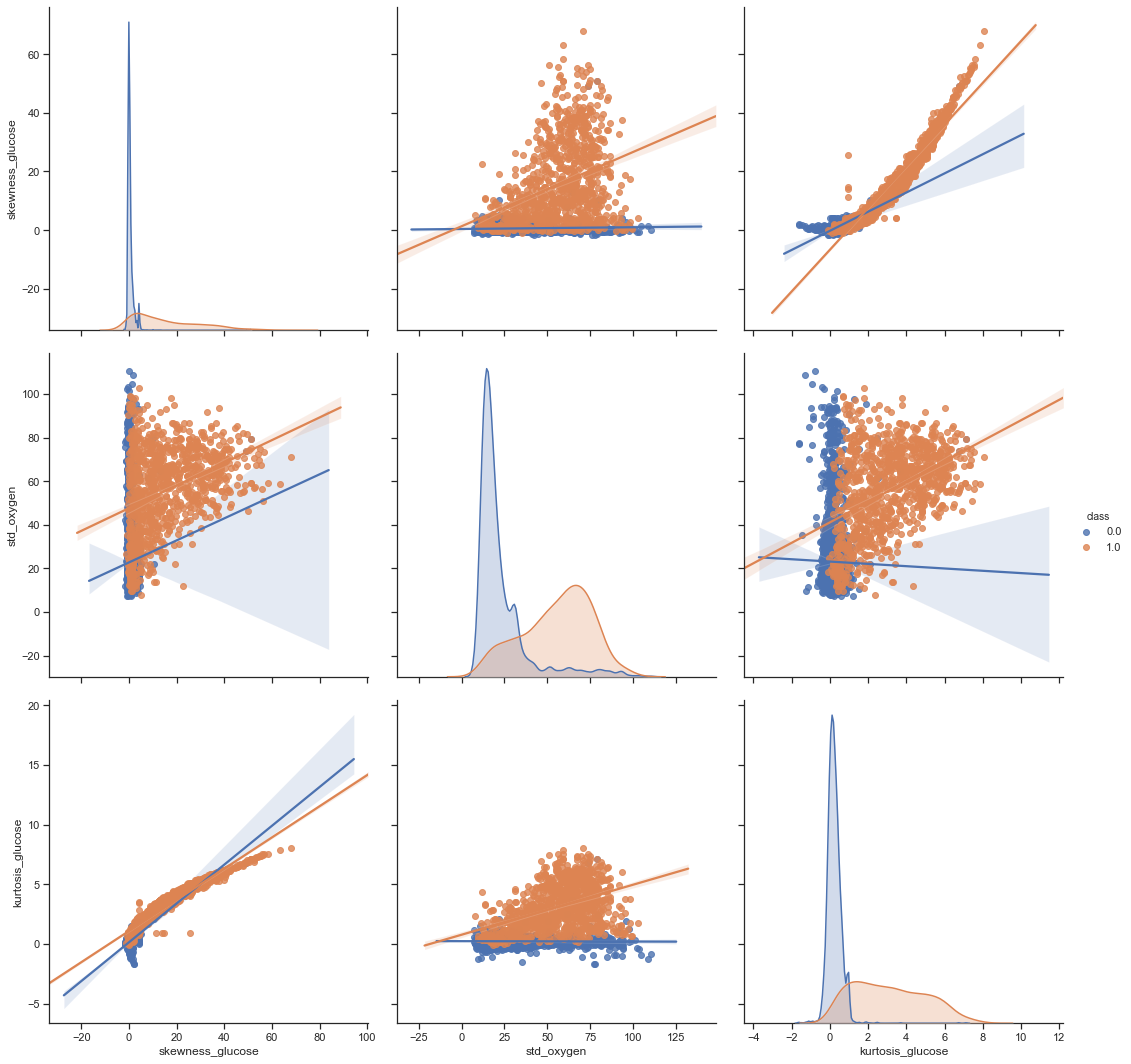

In [14]:
sns.set(style="ticks", color_codes=True)

df = train_1[['skewness_glucose', 'std_oxygen', 'kurtosis_glucose', 'class']]
sns.pairplot(df, height= 5, hue= 'class', vars=['skewness_glucose', 'std_oxygen', 'kurtosis_glucose'], kind="reg")

In [15]:
#the function of the decision tree. We use te 3 atributes with positive correlation [std_oxygen, skewness_glucose, kurtosis_glucose].
#we go throuth the atributs in descending order (to the correlation) starting from kurtosis_glucose. The divider point were read from 
#the graph above. After we were manualy cWe couldn't draw a clear line to separate the ones with diabetes in the gragph std_oxygen. 

def manualDecisionTree(std_oxygen, skewness_glucose, kurtosis_glucose):
    lim_stf_O = 30
    lim_skew_gluc = 7
    lim_kurt_gluc = 1.2
    temp = 0
    
    if kurtosis_glucose > 1.1:
        return 1
    else:
        if skewness_glucose > 6:
            return 1
        else:
            if std_oxygen > 37:
                return 1
            else:
                return 0
  

In [16]:
# callign the finction for the manual prediction.
train_1['pred_class'] = train_1.apply(lambda row : manualDecisionTree(row['std_oxygen'], row['skewness_glucose'], row['kurtosis_glucose']), axis = 1) 

print(confusion_matrix(train_1['class'], train_1['pred_class']))
print(classification_report(train_1['class'], train_1['pred_class']))

[[2666  312]
 [ 105  900]]
              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93      2978
         1.0       0.74      0.90      0.81      1005

    accuracy                           0.90      3983
   macro avg       0.85      0.90      0.87      3983
weighted avg       0.91      0.90      0.90      3983



In [17]:
valid_1['pred_class'] = valid_1.apply(lambda row : manualDecisionTree(row['std_oxygen'], row['skewness_glucose'], row['kurtosis_glucose']), axis = 1) 

print(confusion_matrix(valid_1['class'], valid_1['pred_class']))
print(classification_report(valid_1['class'], valid_1['pred_class']))

[[890 129]
 [ 21 321]]
              precision    recall  f1-score   support

         0.0       0.98      0.87      0.92      1019
         1.0       0.71      0.94      0.81       342

    accuracy                           0.89      1361
   macro avg       0.85      0.91      0.87      1361
weighted avg       0.91      0.89      0.89      1361



We use the first 3 atributes with the highest positive correlation (std_oxygen, skewness_glucose, kurtosis_glucose).
we go throuth the atributs in descending order (to the correlation) starting from kurtosis_glucose. The divider point were read from the graph above the function. We've manualy corrected the limits for optimalizeing the output to the train. We couldn't draw a clear line to separate the ones with diabetes in the gragph std_oxygen. 

In [18]:
#merge
valid_joined = pd.merge(valid_1, valid_2, on='name', how='right')
train_joined = pd.merge(train_1, train_2, on='name', how='right')
del valid_joined['Unnamed: 0_y']
del train_joined['Unnamed: 0_y']
del train_1['name']
del valid_1['name']

In [19]:
#These are some last-minute fixes, that we discowere too late. 
#In order to be able to use classificators, we "fixed" them as fast as possible
from sklearn.tree import DecisionTreeClassifier
X = train_1.drop(['class', 'job', 'country', 'relation', 'pregnant', 'income', 'Unnamed: 0'], axis=1)
y = train_1['class']

X["kurtosis_oxygen"].unique()
X["kurtosis_oxygen"] = pd.to_numeric(X["kurtosis_oxygen"],errors='coerce')
mean = X["kurtosis_oxygen"].mean()
X["kurtosis_oxygen"].fillna(mean, inplace = True)

X["capital-gain"].unique()
X["capital-gain"] = pd.to_numeric(X["capital-gain"],errors='coerce')
mean = X["capital-gain"].mean()
X["capital-gain"].fillna(mean, inplace = True)

X["skewness_oxygen"].unique()
X["skewness_oxygen"] = pd.to_numeric(X["skewness_oxygen"],errors='coerce')
mean = X["skewness_oxygen"].mean()
X["skewness_oxygen"].fillna(mean, inplace = True)

X["hours-per-week"].unique()
X["hours-per-week"] = pd.to_numeric(X["hours-per-week"],errors='coerce')
mean = X["hours-per-week"].mean()
X["hours-per-week"].fillna(mean, inplace = True)

X["capital-loss"].unique()
X["capital-loss"] = pd.to_numeric(X["capital-loss"],errors='coerce')
mean = X["capital-loss"].mean()
X["capital-loss"].fillna(mean, inplace = True)

classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X, y)

y_pred = classifier.predict(X)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[[2978    0]
 [   0 1005]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2978
         1.0       1.00      1.00      1.00      1005

    accuracy                           1.00      3983
   macro avg       1.00      1.00      1.00      3983
weighted avg       1.00      1.00      1.00      3983



In [21]:
#These are some last-minute fixes, that we discowere too late. 
#In order to be able to use classificators, we "fixed" them as fast as possible
X2 = valid_1.drop(['class', 'job', 'country', 'relation', 'pregnant', 'income', 'Unnamed: 0'], axis=1)
y2 = valid_1['class']

X2["kurtosis_oxygen"].unique()
X2["kurtosis_oxygen"] = pd.to_numeric(X2["kurtosis_oxygen"],errors='coerce')
mean = X2["kurtosis_oxygen"].mean()
X2["kurtosis_oxygen"].fillna(mean, inplace = True)

X2["capital-gain"].unique()
X2["capital-gain"] = pd.to_numeric(X2["capital-gain"],errors='coerce')
mean = X2["capital-gain"].mean()
X2["capital-gain"].fillna(mean, inplace = True)

X2["skewness_oxygen"].unique()
X2["skewness_oxygen"] = pd.to_numeric(X2["skewness_oxygen"],errors='coerce')
mean = X2["skewness_oxygen"].mean()
X2["skewness_oxygen"].fillna(mean, inplace = True)

X2["hours-per-week"].unique()
X2["hours-per-week"] = pd.to_numeric(X2["hours-per-week"],errors='coerce')
mean = X2["hours-per-week"].mean()
X2["hours-per-week"].fillna(mean, inplace = True)

X2["capital-loss"].unique()
X2["capital-loss"] = pd.to_numeric(X2["capital-loss"],errors='coerce')
mean = X2["capital-loss"].mean()
X2["capital-loss"].fillna(mean, inplace = True)

X2["education-num"].unique()
X2["education-num"] = pd.to_numeric(X2["education-num"],errors='coerce')
mean = X2["education-num"].mean()
X2["education-num"].fillna(mean, inplace = True)

y2_pred = classifier.predict(X2)

In [22]:
print(confusion_matrix(y2, y2_pred))
print(classification_report(y2, y2_pred))

[[961  58]
 [ 31 311]]
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96      1019
         1.0       0.84      0.91      0.87       342

    accuracy                           0.93      1361
   macro avg       0.91      0.93      0.92      1361
weighted avg       0.94      0.93      0.94      1361



In [23]:
#comparison
#The created manual decision tree algorithm sacrifices a little precision in finding the people with diabetes, 
#in favor to minimalize the potential errors spotting the healthy ones. 
#In spotting healthy people we have achieved a 96% percent on the train dataset and a 98% on the valid 
#(probably due to the randomness of the smaller dataset), 
#while we could spot the people with diabetes with only a 74% on train and 71% on valid. 
#The control algorithm a more even distribution at first 97% for healthy and 84% on the people with diabetes. 
#The created algorithm got87%, 91% on finding health and diabetes while the control algorithm got again a much more 
#even distribution.

In [24]:
#Optimalization of hyperparametres
#for this we will use the cross_val_score
#with the parameter cv=10, it is executed tenfold
#it returns the cross validation score of the classificators
#we will try this with varying parametres to see which gives the best result
#in the end we will try to assemble the best combination of parametres
from sklearn.model_selection import cross_val_score

In [25]:
#maxdepth - The maximum depth of the tree
#the ideal number seems to be 3 - higher and lower numbers will decrease the score 
classifier_to_validate = DecisionTreeClassifier(random_state=0, max_depth = 3)

cross_val_score(classifier_to_validate,X,y,cv=10)

array([0.95488722, 0.94235589, 0.94486216, 0.95488722, 0.95488722,
       0.94974874, 0.96231156, 0.95728643, 0.95717884, 0.95214106])

In [26]:
#min_samples_split - The minimum number of samples required to split an internal node
#the ideal number seems to be 3 - higher and lower numbers will decrease the score 
classifier_to_validate = DecisionTreeClassifier(random_state=0,min_samples_split=2)

cross_val_score(classifier_to_validate,X,y,cv=10)

array([0.91729323, 0.91478697, 0.9197995 , 0.93734336, 0.94736842,
       0.92462312, 0.93467337, 0.93969849, 0.95214106, 0.93198992])

In [27]:
#min_samples_leaf - The minimum number of samples required to be at a leaf node
classifier_to_validate = DecisionTreeClassifier(random_state=0,min_samples_leaf=2)

cross_val_score(classifier_to_validate,X,y,cv=10)

array([0.92982456, 0.92481203, 0.93233083, 0.93984962, 0.94736842,
       0.93467337, 0.92964824, 0.95477387, 0.96221662, 0.93702771])